# Exploratory Data Analysis - Credit Card Fraud Detection

This notebook explores the structure, distribution, and anomalies in the Credit Card Transactions Fraud Detection Dataset from Kaggle.
This dataset can be found at www.kaggle.com/datasets/kartik2112/fraud-detection.

The goal of this EDA is to understand the class imbalance, feature behavior, and patterns that may indicate fraud.

In [1]:
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_loader import load_creditcard_data

sns.set(style="whitegrid", palette="viridis")


Here we will load in the dataset and look at the first five enteries as well as the basic information and the summary statistics

In [3]:
df = load_creditcard_data()
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [15]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1852394.0,NaN,NaN,NaN,537193.44,366910.960483,0.0,231549.0,463098.0,833575.75,1296674.0
trans_date_trans_time,1852394,1819551,2019-04-22 16:02:01,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc_num,1852394.0,NaN,NaN,NaN,417386038393710400.0,1309115265318020352.0,60416207185.0,180042946491150.0,3521417320836166.0,4642255475285942.0,4992346398065154048.0
merchant,1852394,693,fraud_Kilback LLC,6262,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,1852394,14,gas_transport,188029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt,1852394.0,NaN,NaN,NaN,70.063567,159.253975,1.0,9.64,47.45,83.1,28948.9
first,1852394,355,Christopher,38112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,1852394,486,Smith,40940,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,1852394,2,F,1014749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street,1852394,999,444 Robert Mews,4392,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next we will plot the class distribution

Fraudulent transactions are extremely rare. Thus we must understand the imbalance is critical before modeling.

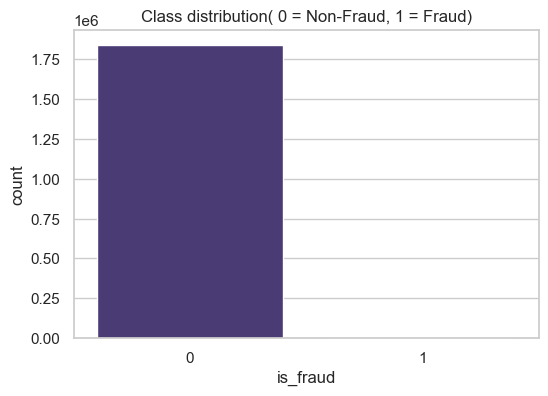

Fraud ratio:  0.00521 ( 0.521%)


In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="is_fraud")
plt.title("Class distribution( 0 = Non-Fraud, 1 = Fraud)")
plt.show()

fraud_ratio = df["is_fraud"].mean()
print(f"Fraud ratio: {fraud_ratio: .5f} ({fraud_ratio*100: .3f}%)")

As we can see the distribution between fraudulent and legitiment transactions is quite low at only 0.521% of transactions in our dataset being fraud.

Next we will look at the distributions of the monetary amounts as fraudulent transactions often have different monetary patterns>

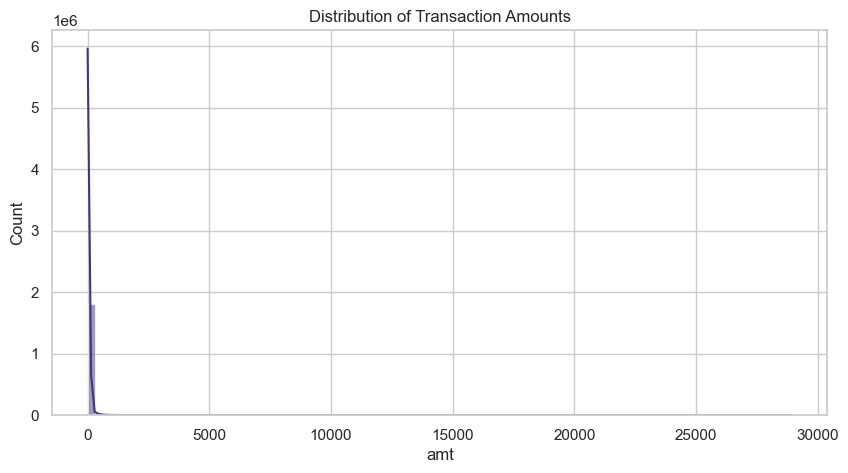

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df["amt"], bins=100, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.show()

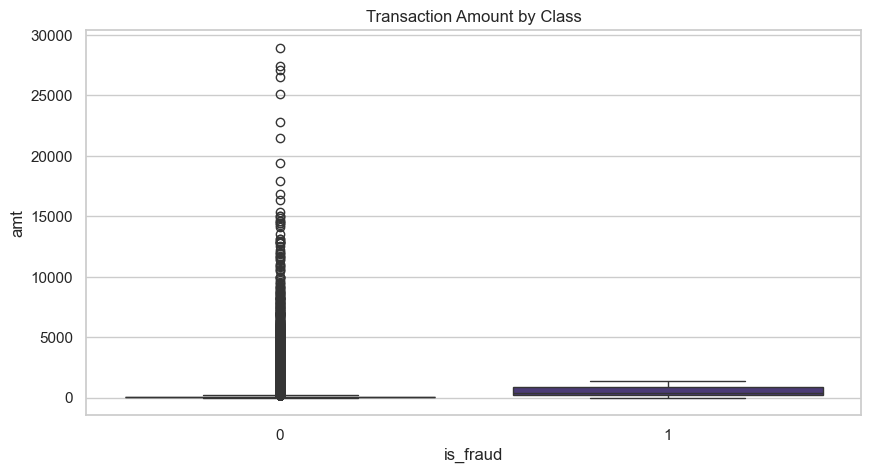

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="is_fraud", y="amt")
plt.title("Transaction Amount by Class")
plt.show()

AS the graphs above show most of our data exists in small amounts with the means being around 70 dollars. legitiment transaction has outliers of high ammount where as fraudulant transactions do not have these outliers. 

Next turning to the time features

First we must engineer some more useful time features

In [17]:
df["timestamp"] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.weekday
df['month'] = df['timestamp'].dt.month

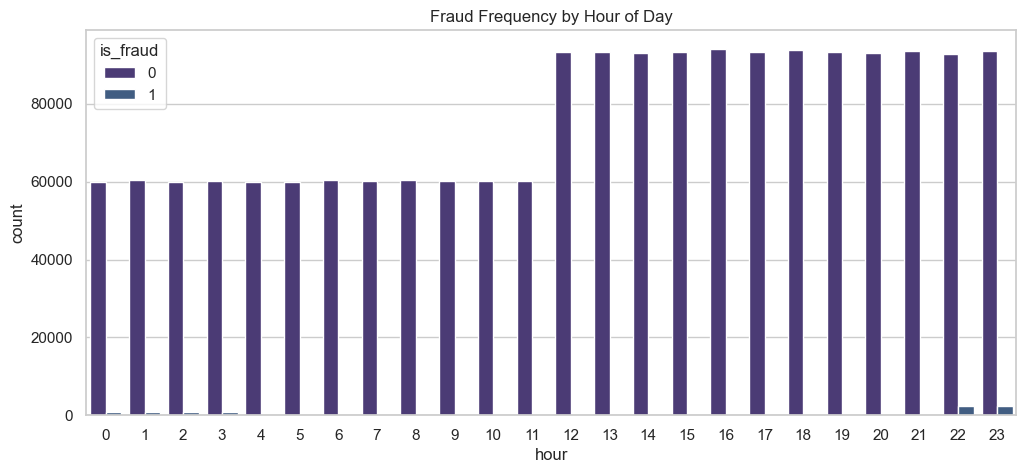

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="hour", hue="is_fraud")
plt.title("Fraud Frequency by Hour of Day")
plt.show()

Looking at the plot we can see their is a pattern in the fraud transactions with most happening in the later evening after about 11pm and into the early morning about 3am.

Moving on to looking at weekday.

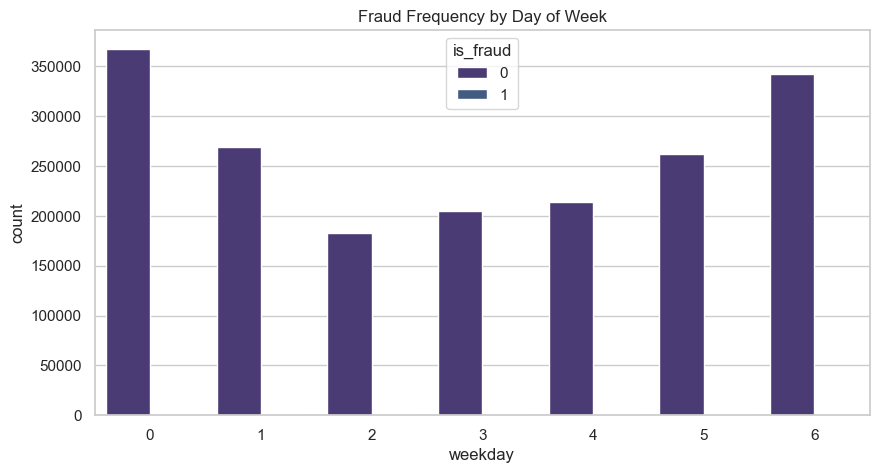

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='weekday', hue='is_fraud')
plt.title("Fraud Frequency by Day of Week")
plt.show()

This does not show us much in a pattern in the fraud data so we must look at a more useful plot.

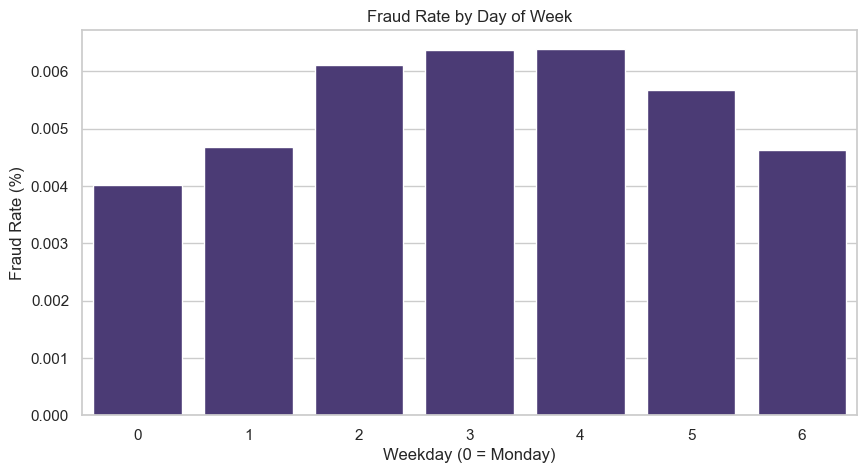

In [22]:
fraud_rate_by_day = df.groupby("weekday")["is_fraud"].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=fraud_rate_by_day.index, y=fraud_rate_by_day.values)
plt.title("Fraud Rate by Day of Week")
plt.ylabel("Fraud Rate (%)")
plt.xlabel("Weekday (0 = Monday)")
plt.show()

Interestingly the highest precentage of fruad transactions during the later end of the weekdays.

Next looking at the geographic features.

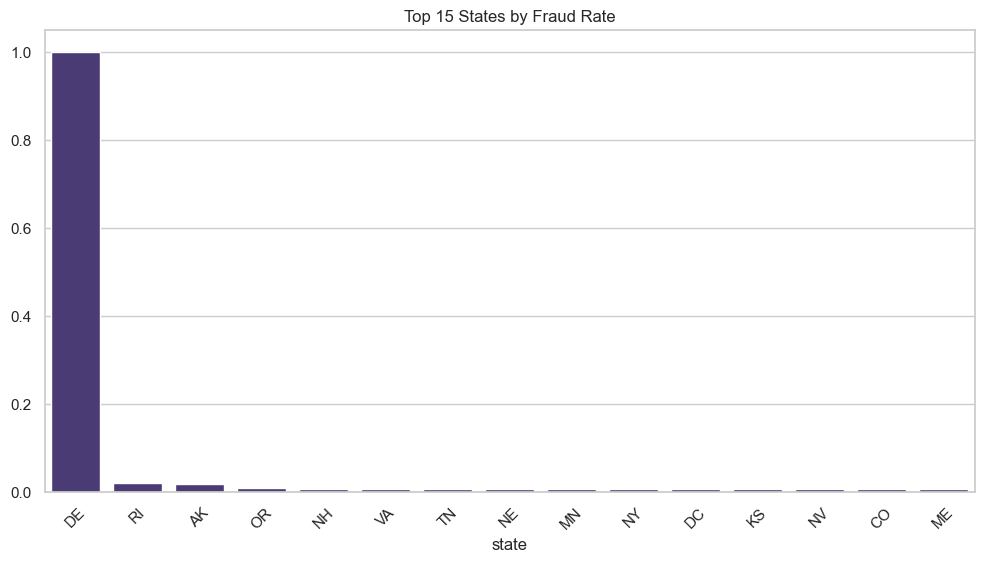

In [23]:
plt.figure(figsize=(12,6))
fraud_by_state = df.groupby("state")["is_fraud"].mean().sort_values(ascending=False).head(15)
sns.barplot(x=fraud_by_state.index, y=fraud_by_state.values)
plt.title('Top 15 States by Fraud Rate')
plt.xticks(rotation=45)
plt.show()

In [26]:
total_de = df[df["state"] == "DE"].shape[0]
print(total_de)

9


Oddly it seems all the transactions in Deleware are fraud. This suggests an error in the data as it is highly unlikely that all transactions from a single state would be fraud. Since we can see there is only 9 transactions it is more benificial to remove these 9 transactions to avoid any model we train from learning that any transaction from DE is fraud, thus preventing leakage in the data from a synthetic artifact.

In [27]:
df = df[df["state"] != "DE"]

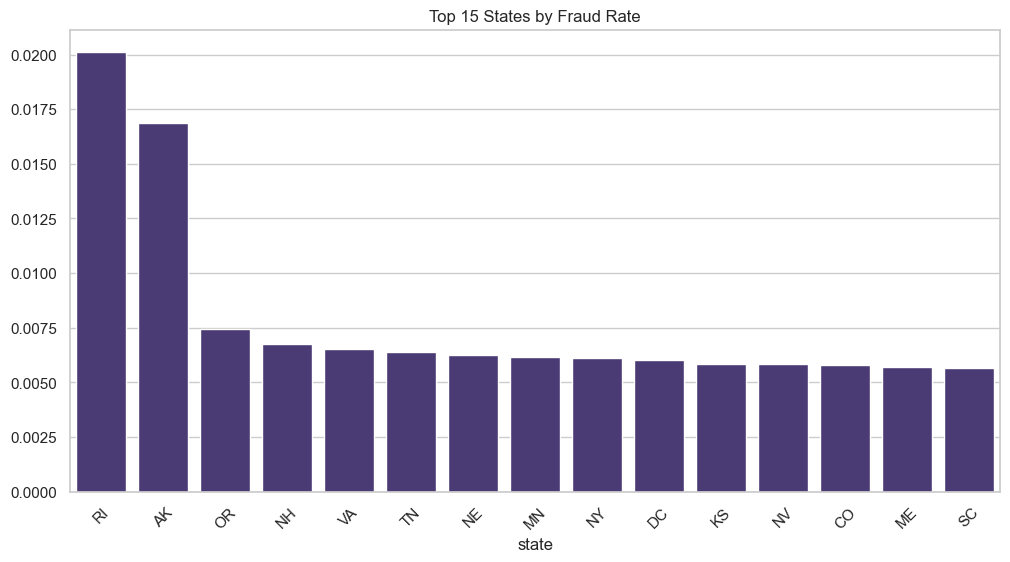

In [28]:
plt.figure(figsize=(12,6))
fraud_by_state = df.groupby("state")["is_fraud"].mean().sort_values(ascending=False).head(15)
sns.barplot(x=fraud_by_state.index, y=fraud_by_state.values)
plt.title('Top 15 States by Fraud Rate')
plt.xticks(rotation=45)
plt.show()

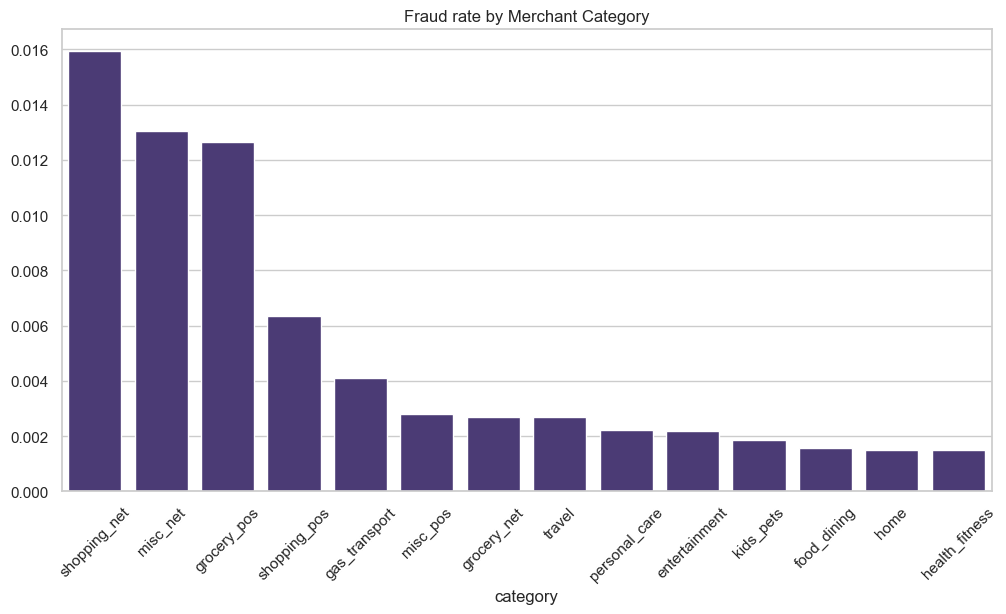

In [24]:
plt.figure(figsize=(12,6))
fraud_by_cat = df.groupby("category")["is_fraud"].mean().sort_values(ascending=False)
sns.barplot(x=fraud_by_cat.index, y=fraud_by_cat.values)
plt.title('Fraud rate by Merchant Category')
plt.xticks(rotation=45)
plt.show()

Next we shall look at the Demographic features

In [30]:
df["dob"] = pd.to_datetime(df["dob"])
df["age"] = (df["timestamp"] - df["dob"]).dt.days // 365

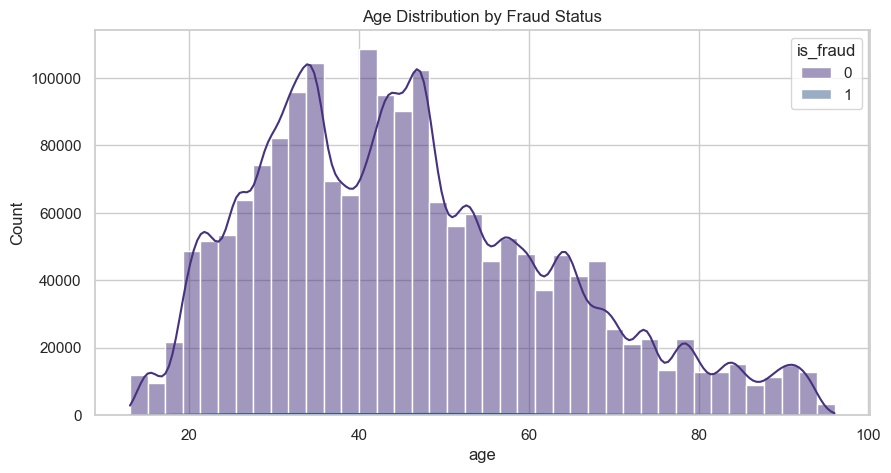

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="age", hue="is_fraud", bins=40, kde=True)
plt.title("Age Distribution by Fraud Status")
plt.show()

Again its hard to see a pattern due to fraud rate being so low. looking at the fraud rate instead

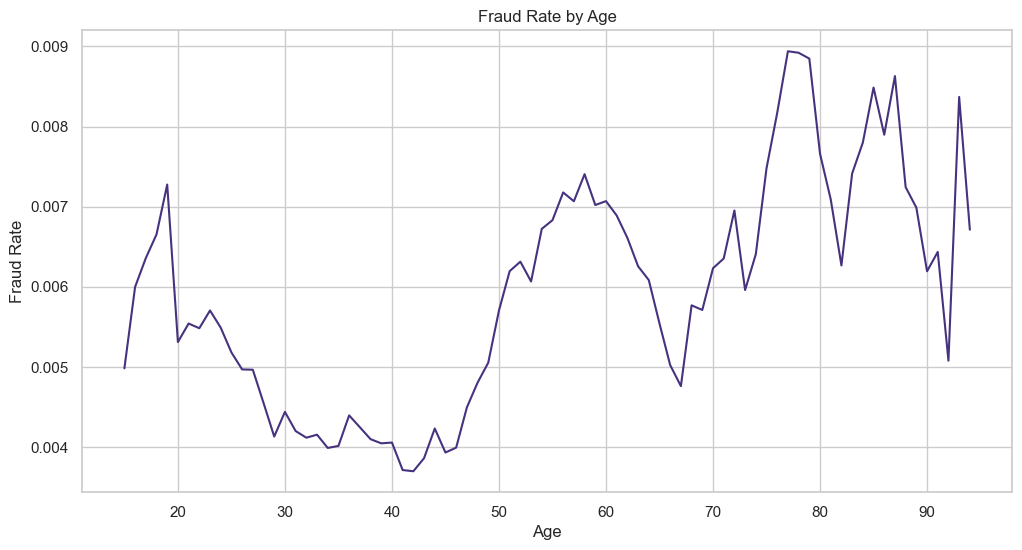

In [33]:
fraud_rate_by_age = df.groupby("age")["is_fraud"].mean()
fraud_rate_smooth = fraud_rate_by_age.rolling(window=5, center=True).mean()

plt.figure(figsize=(12,6))
sns.lineplot(x=fraud_rate_smooth.index, y=fraud_rate_smooth.values)
plt.title("Fraud Rate by Age")
plt.xlabel('Age')
plt.ylabel('Fraud Rate')
plt.show()

This defintly shows us a more interesting pattern that fraud happens high to seniors then it does to the middle age group.

Finally looking a the correlation map.

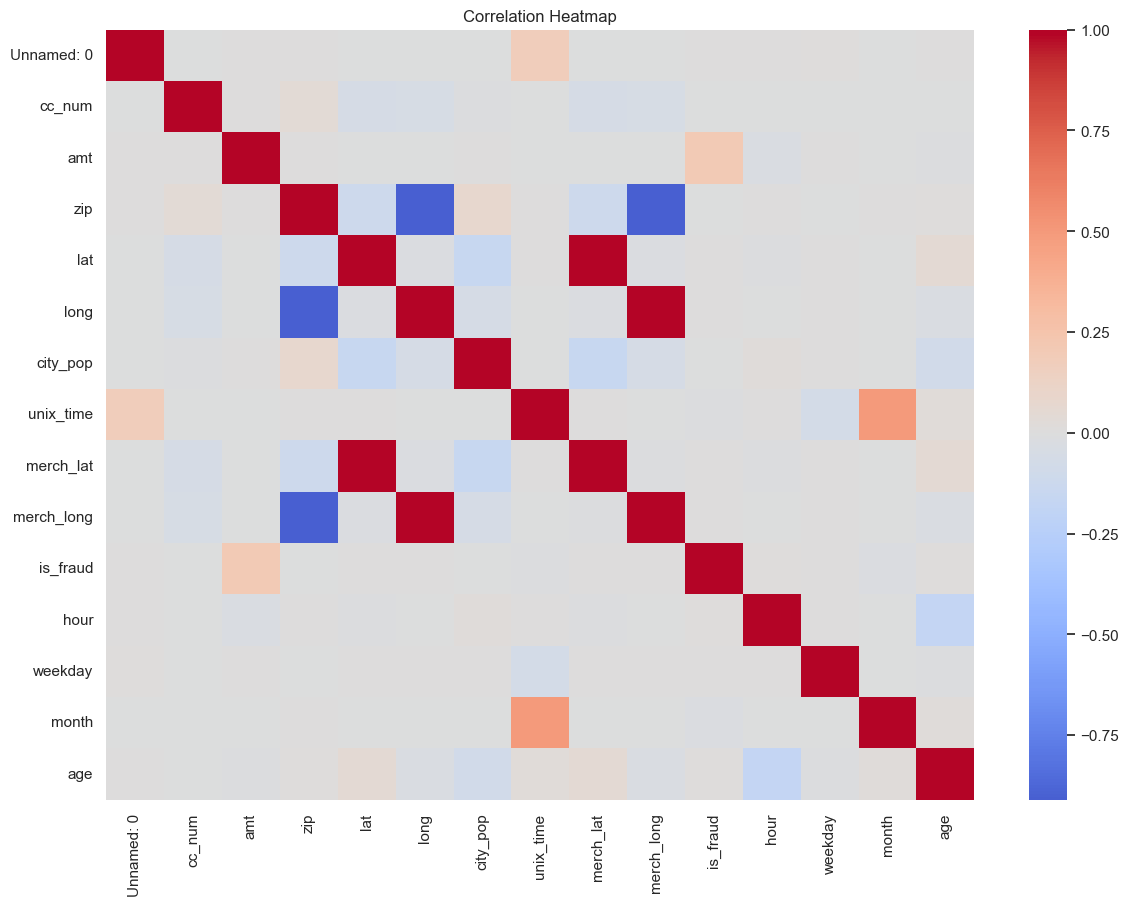

In [34]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14,10))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", center=0)
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap shows us some important information. Primarly it shows us that no single feature has a strong linear relationship with the target variable is_fraud. which is to be expected in fraud detection where patterns are subtle. Geographic features such as lat and long, as well merch_lat and merch_long, exhibit strong internal correlations reflecting natural spatial structure and suggesting that engineered distance-based features may be hihly predictive. The correlation between the time extracted features and the unix-time are strong enough that we can probably remove the unix-time feature since we have extracted useful features from it already and thus can avoid redundancy. Transaction amount (amt) shows only mild correlation with fraud, though earlier analysis revealed distribution differences that still make it a useful feature. Age also shows weak correlation with fraud, but may become informative when interacting with other behavioral or categorical features. Overall, the heatmap confirms that fraud cannot be predicted by any single variable and that effective modeling will rely on non‑linear interactions, engineered features, and tree‑based algorithms capable of capturing complex relationships.


## In Summary

* Fraud rate is extremely low, consistent with real world patterns.
* Fraudulent transactions tend to have different amount distributions but not many outliers like proper transactions.
* Fraud shows slight temporal patterns (hour-of-day, weekday)
* Certain merchant categories and states show higher fraud rates.
* Age and demographic features show possible meaningful separation.
* Geographic and behavioral features could appear predictive.

More work should be looked into to engineer some more predictive features.